Libraries used for Sentiment Analysis:
* Pandas
* NumPy
* MatPlotLib
* Seaborn
* NLTK
* Transformers
* SciPy
* StatsModels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import nltk
nltk.download('all')
from nltk.sentiment import SentimentIntensityAnalyzer
import statsmodels.api as sm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

Importing Cleaned Data in DataFrame

In [ ]:
df=pd.read_csv('cleaned_data.csv')
df.drop(columns=["Route","From","Destination","Unnamed: 0"],inplace=True)

In [ ]:
#Calculating Average of all Star Ratings and then dropping all original columns
ratings=["Seat Comfort","Cabin Staff Service","Ground Service","Value For Money"]
df["Average Rating"]=df[ratings].mean(axis=1)
df.drop(columns=ratings,inplace=True)

#Creating an ID Column
idlist=[x for x in range(0,904)]
df["ID"]=idlist

#Rearraning the data
df=df[["ID","Reviews","Type Of Traveller","Seat Type","Date Flown","Average Rating","Recommended"]]

Frequency Distribution of Average Ratings

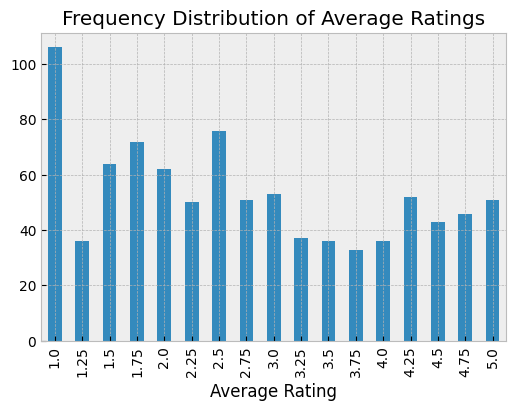

In [ ]:
ax = df["Average Rating"].value_counts().sort_index().plot(kind='bar',title="Average Ratings",figsize=(6,4))
ax.set_title("Frequency Distribution of Average Ratings")
plt.show()

# Basic NLTK

In [ ]:
example=df["Reviews"].values[50]

In [ ]:
tokens= nltk.word_tokenize(example)                  #Tokenize the example

In [ ]:
tagged_tokens = nltk.pos_tag(tokens)                 #Part of Speech Tags are added

In [ ]:
entities = nltk.chunk.ne_chunk(tagged_tokens)        #Creating chunks of reviews

In [ ]:
entities.pprint()

(S
  Not/RB
  a/DT
  great/JJ
  experience/NN
  ./.
  I/PRP
  could/MD
  not/RB
  check/VB
  in/IN
  online/JJ
  as/IN
  two/CD
  separate/JJ
  parts/NNS
  of/IN
  the/DT
  (ORGANIZATION BA/NNP)
  computer/NN
  system/NN
  do/VBP
  not/RB
  talk/VB
  to/TO
  each/DT
  other/JJ
  ./.
  At/IN
  (ORGANIZATION LHR/NNP)
  a/DT
  delightful/JJ
  check/NN
  in/IN
  clerk/NN
  sorted/VBD
  it/PRP
  quickly/RB
  ,/,
  manually/RB
  !/.
  We/PRP
  boarded/VBD
  on/IN
  time/NN
  ,/,
  but/CC
  luggage/NN
  loading/NN
  had/VBD
  to/TO
  be/VB
  halted/VBN
  as/IN
  the/DT
  (GPE Captain/NNP)
  spotted/VBD
  a/DT
  technical/JJ
  issue/NN
  and/CC
  an/DT
  engineer/NN
  was/VBD
  called/VBN
  ./.
  By/IN
  the/DT
  time/NN
  it/PRP
  was/VBD
  sorted/VBN
  we/PRP
  had/VBD
  missed/VBN
  our/PRP$
  slot/NN
  so/RB
  took/VBD
  off/RP
  an/DT
  hour/NN
  behind/IN
  schedule/NN
  ./.
  The/DT
  flight/NN
  was/VBD
  uneventful/JJ
  ,/,
  but/CC
  the/DT
  plane/NN
  had/VBD
  clearly/RB
  seen/VB

# ***Vader Sentiment Scoring***

VADER is Valence Aware Dictionary sEntiment Reasoner

Bag of words Approach

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
res={}
for i, row in enumerate(df["Reviews"]):
  res[i]=sia.polarity_scores(row)

In [ ]:
vaders= pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={"index":"ID"})
vaders= vaders.merge(df, how='left')

In [ ]:
vaders

,ID,neg,neu,pos,compound,Reviews,Type Of Traveller,Seat Type,Date Flown,Average Rating,Recommended
0,0,0.086,0.894,0.020,-0.9381,I flew with British Airways from Heathrow to H...,Solo Leisure,Economy Class,April 2024,2.00,0
1,1,0.100,0.793,0.107,-0.0754,Manchester to Copenhagen via London on 30th Ap...,Solo Leisure,Economy Class,April 2024,3.50,1
2,2,0.102,0.824,0.074,-0.4401,I have never seen such disrespect to a custome...,Solo Leisure,Economy Class,April 2024,1.00,0
3,3,0.098,0.870,0.032,-0.9394,Paid for a 14 hour long flight ticket which in...,Business,Economy Class,April 2024,2.00,0
4,4,0.173,0.718,0.109,-0.9777,Very inconsiderate PA announcements were made ...,Business,Economy Class,April 2024,1.75,0
...,...,...,...,...,...,...,...,...,...,...,...
899,899,0.000,0.740,0.260,0.9485,Miami to London Heathrow with British Airways....,Couple Leisure,Business Class,April 2019,4.25,1
900,900,0.101,0.829,0.071,-0.6652,Houston to London. The plane left an hour late...,Solo Leisure,Economy Class,April 2019,1.75,0
901,901,0.153,0.847,0.000,-0.9732,London to Delhi. The worst business class trip...,Business,Business Class,April 2019,2.25,0
902,902,0.071,0.905,0.024,-0.7437,Bucharest to London. My flight with British Ai...,Business,Economy Class,April 2019,1.50,0


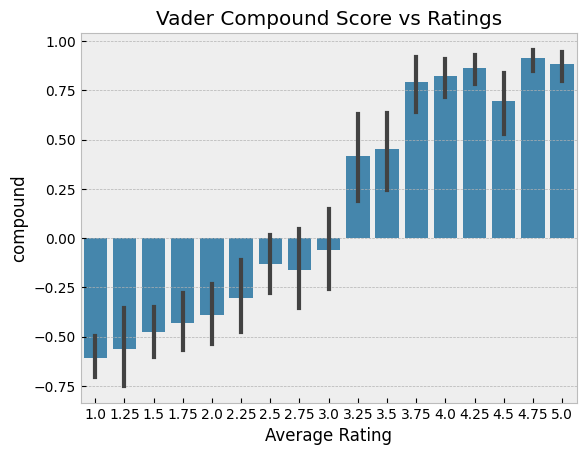

In [ ]:
ax=sns.barplot(data=vaders, x="Average Rating", y="compound")
ax.set_title('Vader Compound Score vs Ratings')
plt.show()

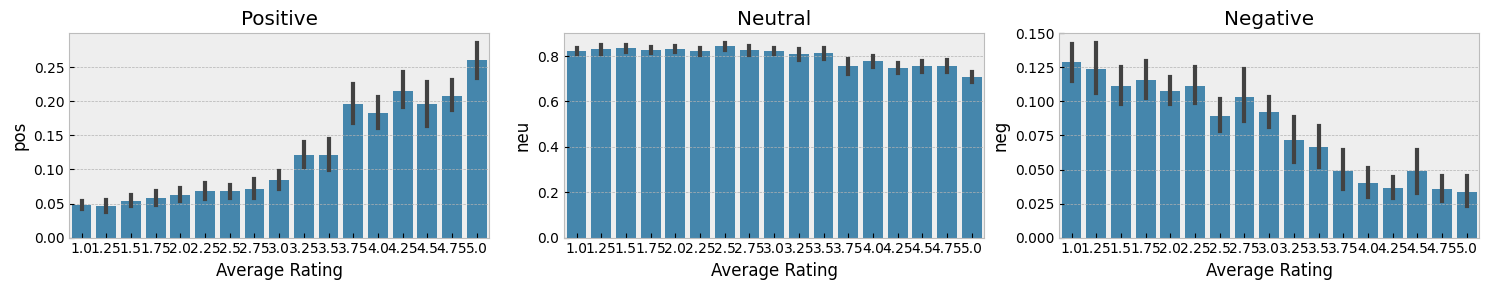

In [ ]:
fig , axs=plt.subplots(1,3, figsize=(15,3))
sns.barplot(data=vaders, x="Average Rating",y="pos", ax = axs[0])
sns.barplot(data=vaders, x="Average Rating",y="neu", ax = axs[1])
sns.barplot(data=vaders, x="Average Rating",y="neg", ax = axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()

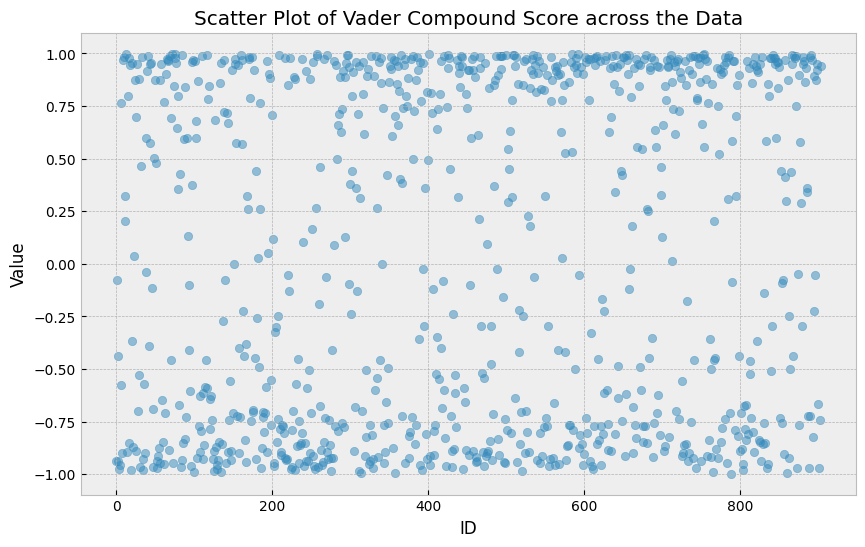

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(vaders['ID'], vaders['compound'], alpha=0.5)
plt.title('Scatter Plot of Vader Compound Score across the Data')
plt.xlabel('ID')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
vaders["compound"].mean()

0.047246017699115045

In [ ]:
bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
labels=["Extremely Negative","Very Negative","Almost Negative","Neutrally Negative","Neutrally Positive","Positive", "Very Positive", "Extremely Positive"]
scores=pd.cut(vaders['compound'],bins=bins,labels=labels)
scores.value_counts()

compound
Extremely Positive    331
Extremely Negative    267
Very Negative          94
Very Positive          59
Almost Negative        49
Positive               46
Neutrally Negative     38
Neutrally Positive     20
Name: count, dtype: int64

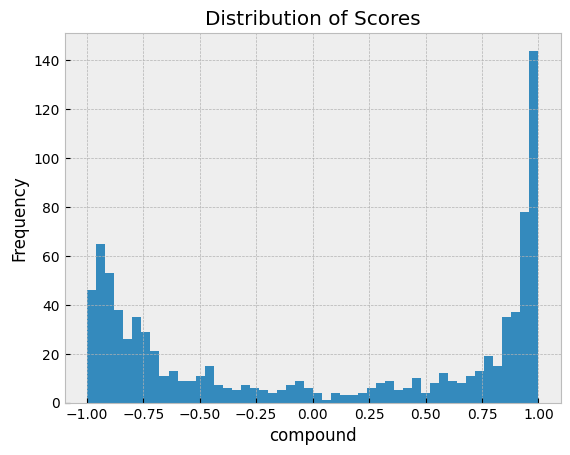

In [ ]:
plt.hist(vaders['compound'], bins=50)
plt.xlabel('compound')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

In [ ]:
bins=[1,2,3,4,5]
labels=["1-2","2-3","3-4","4-5"]
scores=pd.cut(vaders['Average Rating'],bins=bins,labels=labels)
scores.value_counts()

Average Rating
1-2    234
2-3    230
4-5    192
3-4    142
Name: count, dtype: int64

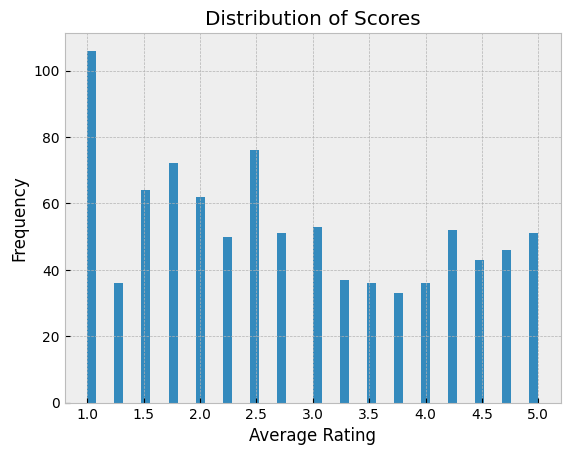

In [ ]:
plt.hist(vaders['Average Rating'], bins=50)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

# ***RoBERTa Model Huggingface***

In [ ]:
MODEL=f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example,return_tensors='pt')
  output=model(**encoded_text)
  op=output[0][0].detach().numpy()
  scores=softmax(op)
  scores_dict={
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2],
  }
  return scores_dict

In [ ]:
res={}
for i, row in enumerate(df["Reviews"]):
  try:
    resvader=sia.polarity_scores(row)
    rename_resvader={}
    for key, val in resvader.items():
      rename_resvader[f'vader_{key}']=val
    resroberta=polarity_scores_roberta(row)
    both={**rename_resvader,**resroberta}
    res[i]=both
  except RuntimeError:
    print(f"Broke at {i}")

Broke at 6
Broke at 13
Broke at 47
Broke at 72
Broke at 118
Broke at 145
Broke at 164
Broke at 205
Broke at 219
Broke at 271
Broke at 276
Broke at 292
Broke at 314
Broke at 395
Broke at 467
Broke at 520
Broke at 539
Broke at 585
Broke at 633
Broke at 634
Broke at 765
Broke at 788
Broke at 819


In [ ]:
result_df= pd.DataFrame(res).T
result_df= result_df.reset_index().rename(columns={"index":"ID"})
result_df= result_df.merge(df, how='left')

In [ ]:
result_df.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Reviews,Type Of Traveller,Seat Type,Date Flown,Average Rating,Recommended
0,0,0.086,0.894,0.020,-0.9381,0.856823,0.129664,0.013513,I flew with British Airways from Heathrow to H...,Solo Leisure,Economy Class,April 2024,2.00,0
1,1,0.100,0.793,0.107,-0.0754,0.460547,0.364771,0.174683,Manchester to Copenhagen via London on 30th Ap...,Solo Leisure,Economy Class,April 2024,3.50,1
2,2,0.102,0.824,0.074,-0.4401,0.973114,0.024247,0.002639,I have never seen such disrespect to a custome...,Solo Leisure,Economy Class,April 2024,1.00,0
3,3,0.098,0.870,0.032,-0.9394,0.808972,0.171510,0.019518,Paid for a 14 hour long flight ticket which in...,Business,Economy Class,April 2024,2.00,0
4,4,0.173,0.718,0.109,-0.9777,0.915972,0.075356,0.008672,Very inconsiderate PA announcements were made ...,Business,Economy Class,April 2024,1.75,0


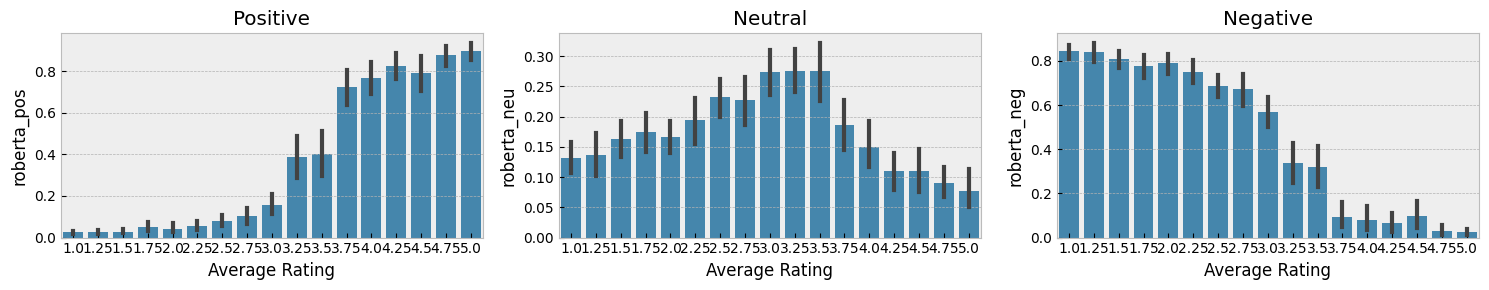

In [ ]:
fig , axs=plt.subplots(1,3, figsize=(15,3))
sns.barplot(data=result_df, x="Average Rating",y="roberta_pos", ax = axs[0])
sns.barplot(data=result_df, x="Average Rating",y="roberta_neu", ax = axs[1])
sns.barplot(data=result_df, x="Average Rating",y="roberta_neg", ax = axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()

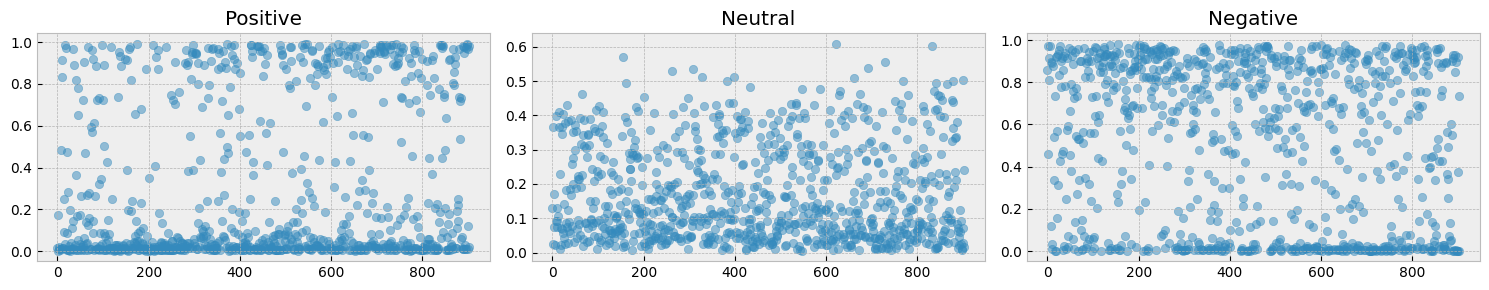

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
plt.sca(axs[0])
plt.scatter(x=result_df["ID"], y=result_df["roberta_pos"], alpha=0.5)
axs[0].set_title("Positive")

plt.sca(axs[1])
plt.scatter(x=result_df["ID"], y=result_df["roberta_neu"], alpha=0.5)
axs[1].set_title("Neutral")

plt.sca(axs[2])
plt.scatter(x=result_df["ID"], y=result_df["roberta_neg"], alpha=0.5)
axs[2].set_title("Negative")

plt.tight_layout()
plt.show()

In [ ]:
bins=[0,0.25,0.5,0.75,1]
labels=["0-25","25-50", "50-75", "75-100"]
scores=pd.cut(result_df['roberta_neg'],bins=bins,labels=labels)
scores.value_counts()

roberta_neg
75-100    368
0-25      299
50-75     135
25-50      79
Name: count, dtype: int64

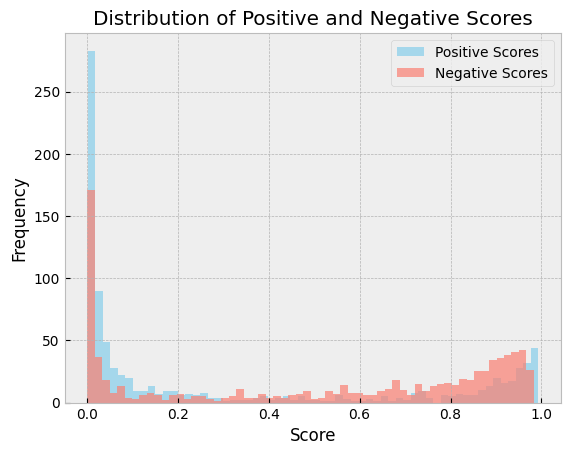

In [ ]:
plt.hist(result_df['roberta_pos'], bins=60, color='skyblue', alpha=0.7, label='Positive Scores')
plt.hist(result_df['roberta_neg'], bins=60, color='salmon', alpha=0.7, label='Negative Scores')

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Scores')
plt.legend()

plt.show()

# ***Comparing VADER and RoBRTa***

In [ ]:
result_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Reviews',
       'Type Of Traveller', 'Seat Type', 'Date Flown', 'Average Rating',
       'Recommended'],
      dtype='object')

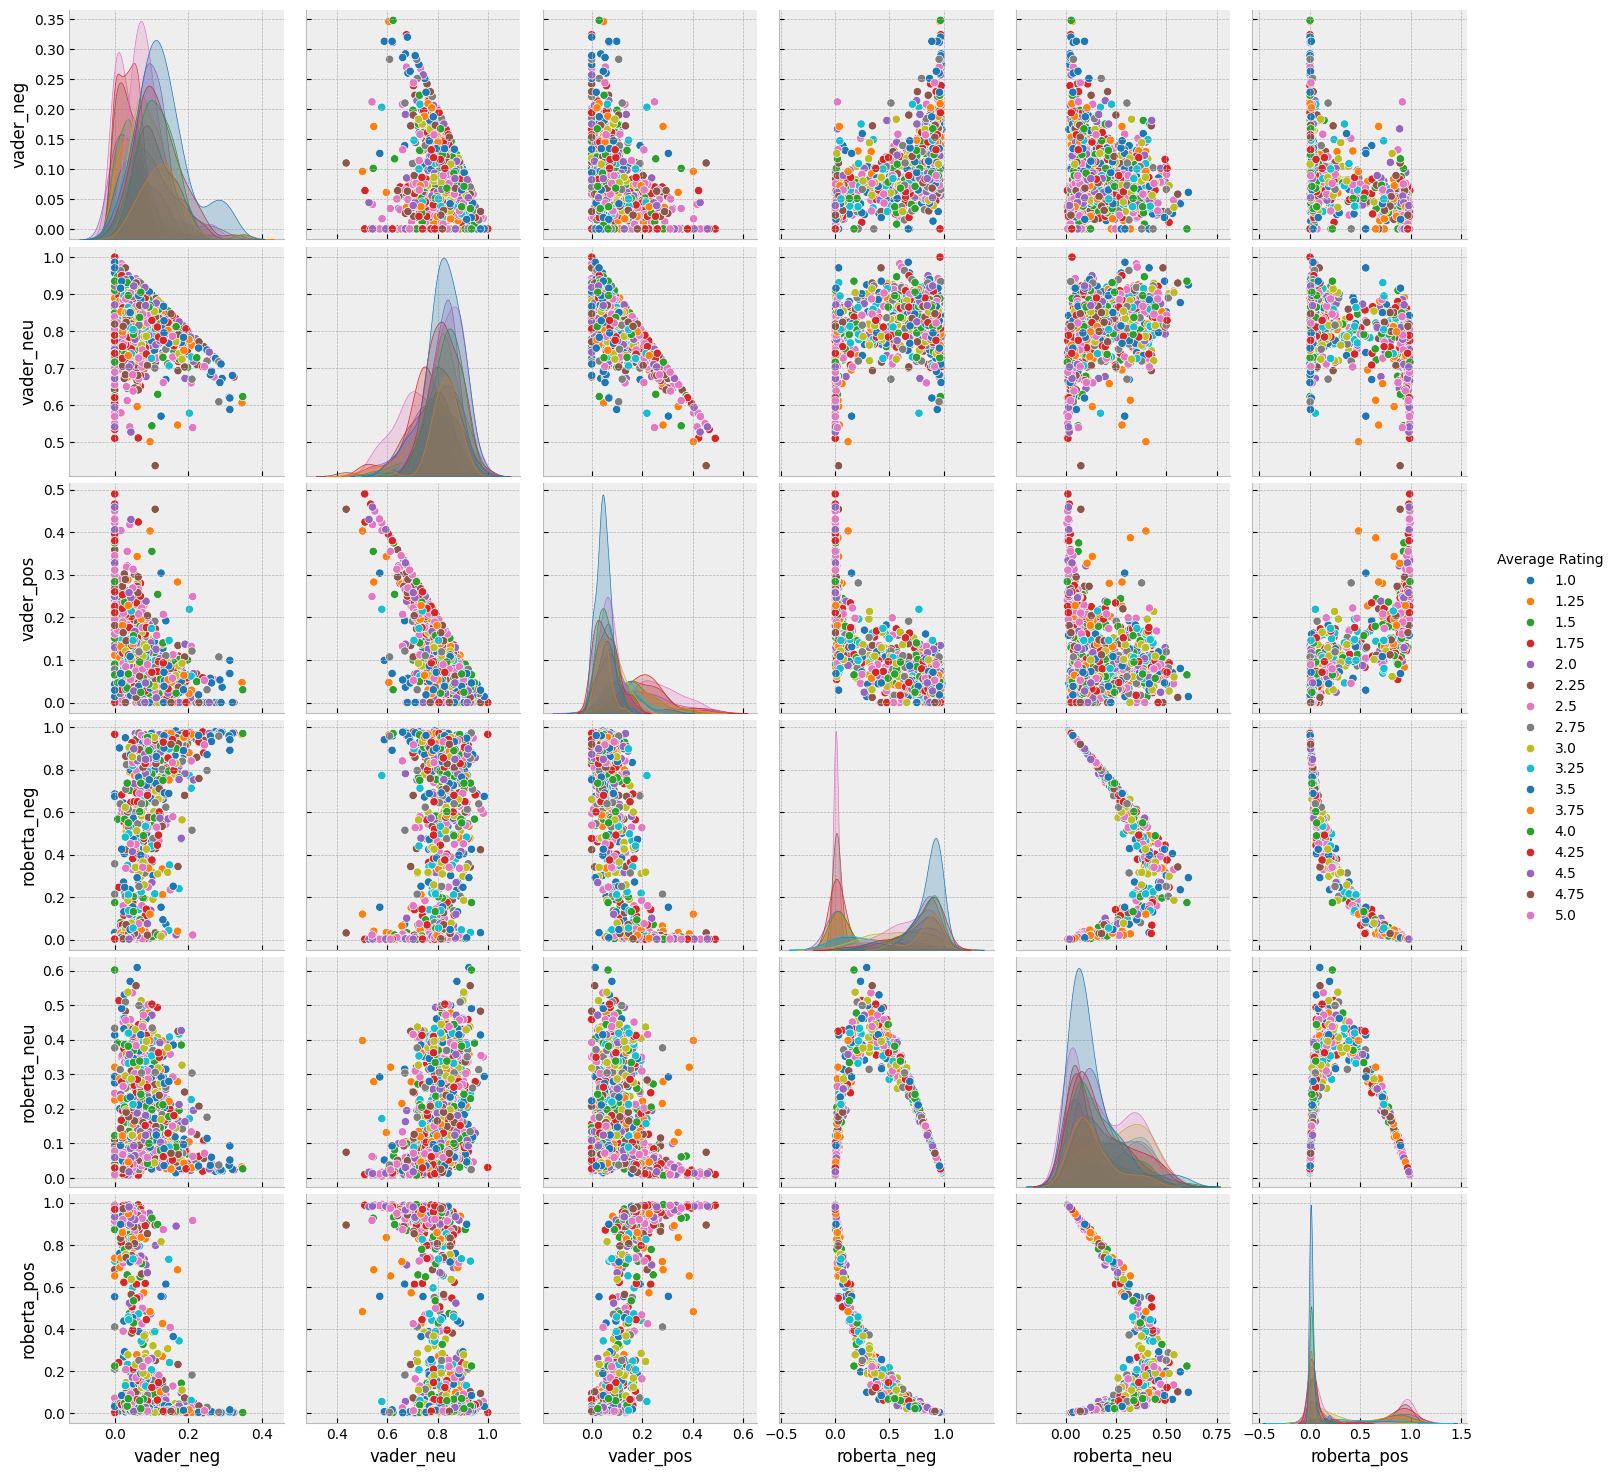

In [ ]:
sns.pairplot(data=result_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu','roberta_pos'], hue='Average Rating',palette='tab10')
plt.show()

Viewing Examples

In [ ]:
result_df.query("`Average Rating`==1").sort_values('roberta_pos',ascending=False)['Reviews'].values[0]

"I was told I'd require a 48 hr negative covid test for entry into Philippines. Booked my trip via BA.com, with a transfer in Singapore. They delay my transfer to the next day, okay, not too bothered as have my 48 hr negative covid test, but when I try to check in at Changi Airport, the Philippines Airlines check in staff require a 24 hr negative covid test. Had to rush to a different terminal, get tested, wait for the result, rush back to check in ...the gate had closed.  Had to book an extra night in Singapore hotel, book my own flight to Manila, then also the return journey back to London. If one misses one leg of a BA booked flight, the remaining flights get cancelled.  I discovered Oman Air Business Class and better then British Airways, from treating their customers, quality of service, the business class experience."

In [ ]:
result_df.query("`Average Rating`==1").sort_values('vader_pos',ascending=False)['Reviews'].values[0]

"Despite BA's promise to credit double tier points for a holiday booked on their website I have received no additional points and my four email communications (including to the Chief Executive) have remained unanswered. Do not be taken in by this marketing con - they just want you to book a holiday and then do not follow up on their promises. Some things just do not change at BA."

In [ ]:
result_df.query("`Average Rating`==5").sort_values('roberta_pos',ascending=False)['Reviews'].values[0]

'The crew at Denver airport is top notch! So impressed with their customer service. They were very patient and courteous. Thank you all for being amazing.'

In [ ]:
result_df.query("`Average Rating`==5").sort_values('vader_pos',ascending=False)['Reviews'].values[0]

'Hong Kong to London. Great airline indeed! Staff were friendly and helpful! The aircraft was very clean. The crews are diverse. Will definitely fly again.'

In [ ]:
result_df.query("`Average Rating`==5").sort_values('roberta_neg',ascending=False)['Reviews'].values[0]

'A serious medical problem appeared while I was onboard. I informed the crew and they helped me out. Unfortunately I was in transit but travelling further became too difficult because of how unwell I became. Also I could not find my way back home in my condition. Thankfully the crew has helped me in every step of the journey until I returned back home. It was a stressful experience but the crew of British Airways made it way more tolerable.'

In [ ]:
result_df.query("`Average Rating`==5").sort_values('vader_neg',ascending=False)['Reviews'].values[0]

'Buenos Aires to London. I wish to thank the crew that was so nice to me while I was terribly sick. Wish I knew their names! They gave me medicine, a blanket and caressed my back while I was crying from the stomach ache. Forever grateful.'

In [ ]:
result_df.query("`Average Rating`==1").sort_values('roberta_neg',ascending=False)['Reviews'].values[0]

'The staff are very rude and not trained properly. No exceptions are made for children and elderly people. The price of the ticket is very expensive given the distance and the service is extremely extremely poor'

In [ ]:
result_df.query("`Average Rating`==1").sort_values('vader_neg',ascending=False)['Reviews'].values[0]

'This is the worst airline. Not one thing went right. I don’t understand how they have got it so bad. Late take off, no gate when we arrived. Bags took over 40 minutes to arrive. Horrendous'

Exporting DataFrame to a CSV File

In [ ]:
result_df.to_csv("sentiment_data.csv")